## Praproses Data Penelitian

### 1. Deklarasi Pustaka

In [1]:
# pustaka manipulasi data array
import numpy as np
from numpy import concatenate

# pustaka manipulasi data frame
import pandas as pd
from pandas import concat
from pandas import DataFrame

# pustaka tanggal
from datetime import datetime
from matplotlib import pyplot as plt

# pustaka normalisasi data
from sklearn.preprocessing import MinMaxScaler
from mlxtend.preprocessing import minmax_scaling

# pustaka data latih dan data uji
from sklearn.model_selection import train_test_split

### 2. Deklarasi Function

In [2]:
# define function
def plot_time_series(x, y, label, title):
    
    # membuat frame
    fig, ax = plt.subplots(figsize = (10,5))
    
    # membuat time series plot
    ax.plot(x, y, color="tab:blue", label=label, linewidth=2.5)
    
    # membuat label-label
    ax.set_title(title, fontsize=14)
    ax.set_xlabel("", fontsize=12)
    ax.set_ylabel("", fontsize=12)
    ax.legend(loc="best")
    ax.grid(True)
    
    # menampilkan plot
    plt.show()

### 3. Hotspot Sumatera Selatan

- Loada dataset

In [3]:
# load dataset
df_hotspot = pd.read_csv("dataset/hotspot_sumsel_harian_2001_2022.csv", parse_dates=["acq_date"])

In [4]:
# # set index 
# df_hotspot = df_hotspot.set_index("acq_date")

In [5]:
df_hotspot

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,-2.8201,104.0716,307.4,1.9,1.3,2001-01-14,405,Terra,MODIS,41,6.03,288.7,7.6,D,2
1,-2.8225,104.0882,313.2,1.9,1.3,2001-01-14,405,Terra,MODIS,68,6.03,290.7,17.7,D,2
2,-2.8277,104.0809,313.9,1.9,1.3,2001-01-14,405,Terra,MODIS,68,6.03,290.8,19.4,D,2
3,-2.8246,104.0782,302.3,1.8,1.3,2001-02-10,1607,Terra,MODIS,48,6.03,279.1,11.8,N,2
4,-2.8216,104.0829,306.1,1.2,1.1,2001-02-23,1536,Terra,MODIS,67,6.03,290.8,7.3,N,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157941,-4.6173,103.9194,321.8,1.0,1.0,2022-10-01,647,Aqua,MODIS,74,6.03,295.8,12.5,D,0
157942,-4.6186,103.9105,334.2,1.0,1.0,2022-10-01,647,Aqua,MODIS,86,6.03,294.0,27.6,D,0
157943,-4.5187,104.1601,317.5,1.0,1.0,2022-10-01,647,Aqua,MODIS,68,6.03,297.1,6.7,D,0
157944,-4.5978,103.9897,316.0,1.3,1.1,2022-10-03,634,Aqua,MODIS,58,6.03,288.0,14.1,D,0


- Aggregasi dataset

In [6]:
# Agregasi data harian menjadi bulanan dengan menghitung jumlah hotspot per bulan
df_hotspot_bulanan = df_hotspot.resample('M', on='acq_date').size().reset_index(name='hotspot')

In [7]:
df_hotspot_bulanan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   acq_date  264 non-null    datetime64[ns]
 1   hotspot   264 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 4.3 KB


In [8]:
df_hotspot_bulanan

,acq_date,hotspot
0,2001-01-31,3
1,2001-02-28,5
2,2001-03-31,10
3,2001-04-30,20
4,2001-05-31,39
...,...,...
259,2022-08-31,82
260,2022-09-30,40
261,2022-10-31,15
262,2022-11-30,10


In [9]:
# df_hotspot_bulanan.to_csv("dataset/hotspot_sumsel_bulanan_2001_2022.csv", index=False)

- Visualisasi dataset

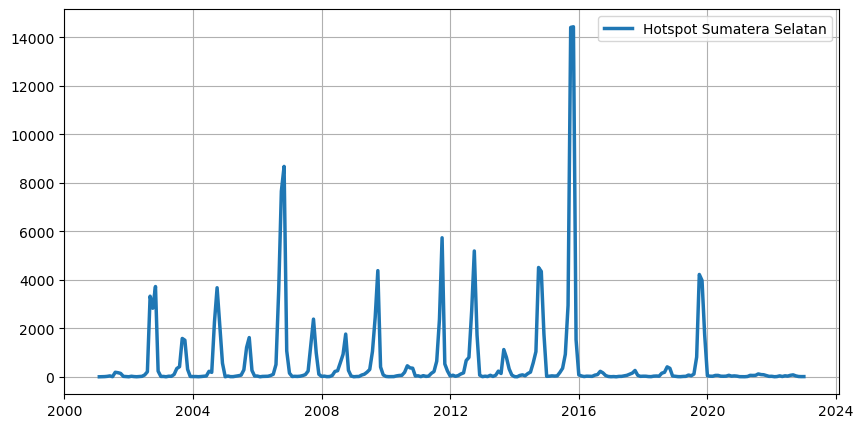

In [10]:
plot_time_series(df_hotspot_bulanan["acq_date"], df_hotspot_bulanan["hotspot"], "Hotspot Sumatera Selatan", "")

### 4. Index SOI

In [11]:
soi = pd.read_excel("dataset/dataset_enso.xlsx", sheet_name="SOI Results")

In [12]:
soi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      264 non-null    datetime64[ns]
 1   anomali   264 non-null    float64       
 2   standard  264 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 6.3 KB


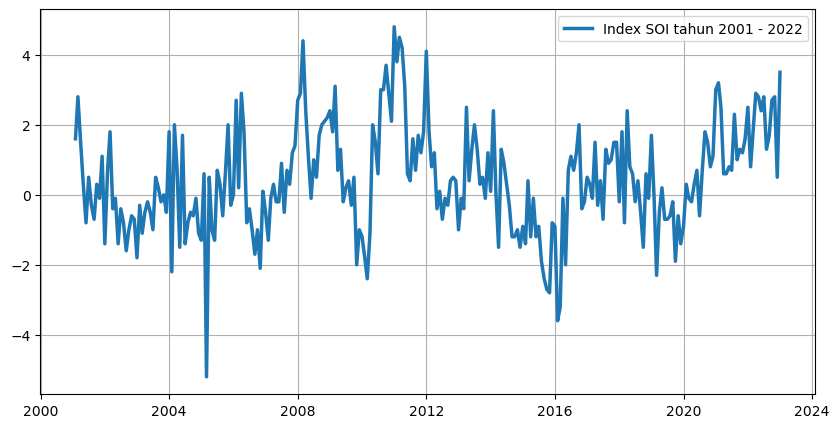

In [13]:
plot_time_series(soi["date"], soi["anomali"], "Index SOI tahun 2001 - 2022", "")

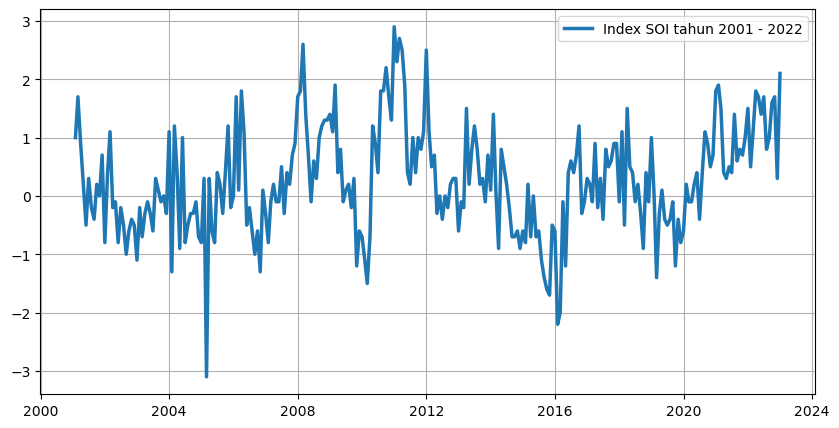

In [14]:
plot_time_series(soi["date"], soi["standard"], "Index SOI tahun 2001 - 2022", "")